In [1]:
%matplotlib inline
import torch
import numpy as np 
from d2l import torch as d2l

### 坐标格式

In [2]:
def bbox_to_rect(bbox, color):
# ((左上x,左上y),宽,⾼)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)

In [ ]:
import json

def read_json(path):
    with open(path, 'r') as f:
        for line in f:
            temp = json.loads(line)        
    
    return temp

### 画一个

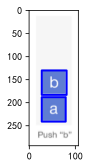

In [26]:
def draw(index, img, cords): 
    
    d2l.set_figsize()
    fig = d2l.plt.imshow(img)
    for i in cords:
        fig.axes.add_patch(bbox_to_rect(i,'blue'))

        
path = './Q.json'
data_json = read_json(path)

index = str(20)
iname = data_json[index]['diagram_path'].split("\\")[-1]
img = d2l .plt.imread('./Diagrams/' + iname)
cords = data_json[index]['cords']

draw(index, img, cords)

### 画多个

In [6]:
import os
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体支持

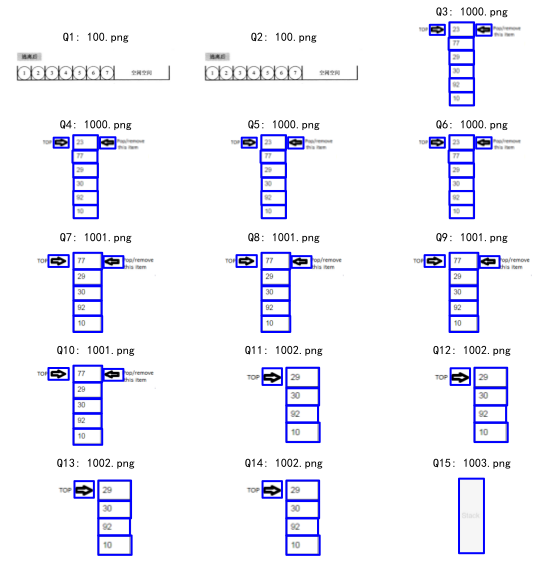

<Figure size 720x720 with 0 Axes>

In [38]:
ind = 1
colum = int(len(data_json)/4)

fig, axes = plt.subplots(5, 3, figsize=(8, 8), tight_layout=1)
fig = plt.figure(figsize = (10,10))  # 画布大小，单位英寸（/72pix）

for row in range(5):
    for col in range(3):
        index = str(ind)
        iname = data_json[index]['diagram_path'].split("\\")[-1]
        img = d2l.plt.imread('./Diagrams/' + iname)
        cords = data_json[index]['cords']
        axes[row, col].imshow(img)
        for i in cords:
            axes[row, col].axes.add_patch(bbox_to_rect(i,'blue'))
        axes[row, col].axis('off')  # 去坐标
        axes[row, col].set_title(f'Q{index}: {iname}')
        ind += 1
        
plt.show()